In [1]:
#Import the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
import csv
import random
from datetime import datetime, timedelta

## Analysis Violation

In [2]:
df_main = pd.read_csv("/Users/acemitto/Desktop/traffic_violation_tw.csv")
num_lines = df_main.shape[0]
print("Number of lines in the CSV file: ", num_lines)
 
df_main

Number of lines in the CSV file:  13


,No,Day,Hour,Time,LicensePlate,Location,VehicleType,ViolationType,Violation,Image,Status
0,2,2023-12-17,15,2023-12-17 15:00:50.758916,######,NaN,Car,2,Illegal Parking,D:/TW/CAM/VIOLATION/VI_PHAM_2023-12-17 1.png,Normal
1,3,2023-12-17,15,2023-12-17 15:02:43.375702,######,NaN,Car,2,Illegal Parking,D:/TW/CAM/VIOLATION/VI_PHAM_2023-12-17 2.png,Normal
2,4,2023-12-17,15,2023-12-17 15:03:59.522185,######,NaN,Car,0,Over Speed (over 60km/h),D:/TW/CAM/VIOLATION/VI_PHAM_2023-12-17 3.png,Normal
3,5,2023-12-17,15,2023-12-17 15:05:57.346327,######,NaN,Car,1,Not Follow The Traffic Light,D:/TW/CAM/VIOLATION/VI_PHAM_2023-12-17 4.png,Normal
4,6,2023-12-17,15,2023-12-17 15:05:59.432576,######,NaN,Motocycle,1,Not Follow The Traffic Light,D:/TW/CAM/VIOLATION/VI_PHAM_2023-12-17 5.png,Normal
5,7,2023-12-17,15,2023-12-17 15:05:31.820303,######,NaN,Motocycle,1,Not Follow The Traffic Light,D:/TW/CAM/VIOLATION/VI_PHAM_2023-12-17 6.png,Normal
6,8,2023-12-17,15,2023-12-17 15:07:00.627679,######,NaN,Motocycle,2,Illegal Parking,D:/TW/CAM/VIOLATION/VI_PHAM_2023-12-17 7.png,Normal
7,9,2023-12-17,15,2023-12-17 15:10:35.175991,######,NaN,Car,2,Illegal Parking,D:/TW/CAM/VIOLATION/VI_PHAM_2023-12-17 8.png,Normal
8,10,2023-12-17,15,2023-12-17 15:12:18.324132,######,NaN,Car,2,Illegal Parking,D:/TW/CAM/VIOLATION/VI_PHAM_2023-12-17 9.png,Normal
9,11,2023-12-17,15,2023-12-17 15:15:45.880985,######,NaN,Car,1,Not Follow The Traffic Light,D:/TW/CAM/VIOLATION/VI_PHAM_2023-12-17 10.png,Normal


In [3]:
df_oneDay = df_main[df_main['Day'] == "2023-12-17"]
df_oneDay_moto = df_oneDay[df_oneDay['VehicleType'] == "Motocycle"]
df_oneDay_car = df_oneDay[df_oneDay['VehicleType'] == "Car"]
df_oneDay_truck = df_oneDay[df_oneDay['VehicleType'] == "Truck"]
df_oneDay_bus = df_oneDay[df_oneDay['VehicleType'] == "Bus"]

df_oneDay_0 = df_oneDay[df_oneDay['ViolationType'] == 0]
df_oneDay_1 = df_oneDay[df_oneDay['ViolationType'] == 1]
df_oneDay_2 = df_oneDay[df_oneDay['ViolationType'] == 2]
df_oneDay_3 = df_oneDay[df_oneDay['ViolationType'] == 3]

hour_label = ['12:00 AM','1:00 AM','2:00 AM','3:00 AM','4:00 AM','5:00 AM','6:00 AM','7:00 AM','8:00 AM','9:00 AM','10:00 AM','11:00 AM'
	 ,'12:00 PM','1:00 PM','2:00 PM','3:00 PM','4:00 PM','5:00 PM','6:00 PM','7:00 PM','8:00 PM','9:00 PM','10:00 PM','11:00 PM']

date_label = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

violation_label = ['Over Speed (over 60km/h)', 'Not Follow The Traffic Light', 'Illegal Parking', 'Going In The Wrong Lane']

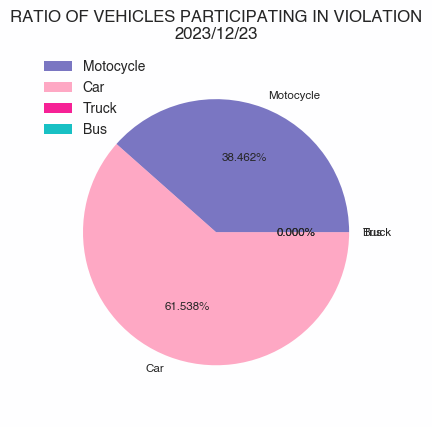

In [4]:
sizes = np.array([len(df_oneDay_moto), len(df_oneDay_car), len(df_oneDay_truck), len(df_oneDay_bus)])
labels = ["Motocycle", "Car", "Truck", "Bus"]
plt.subplots()

plt.pie(sizes, labels=labels, autopct='%1.3f%%', textprops={'size': 'smaller'}, radius=0.9)
plt.legend()
plt.title("RATIO OF VEHICLES PARTICIPATING IN VIOLATION\n2023/12/23")  # add title 
plt.show()

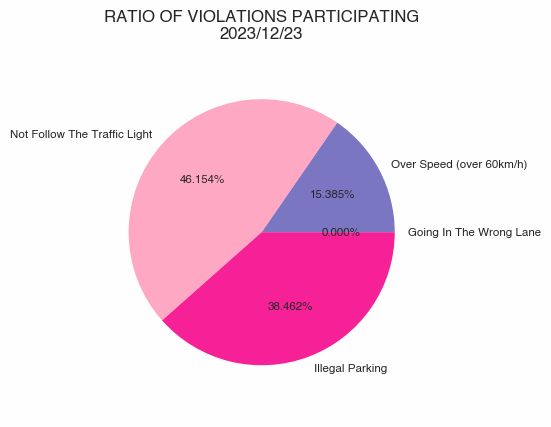

In [5]:
sizes = np.array([len(df_oneDay_0), len(df_oneDay_1), len(df_oneDay_2), len(df_oneDay_3)])
labels = violation_label
plt.subplots()

plt.pie(sizes, labels=labels, autopct='%1.3f%%', textprops={'size': 'smaller'}, radius=0.9)

plt.title("RATIO OF VIOLATIONS PARTICIPATING\n2023/12/23")  # add title 
plt.show()

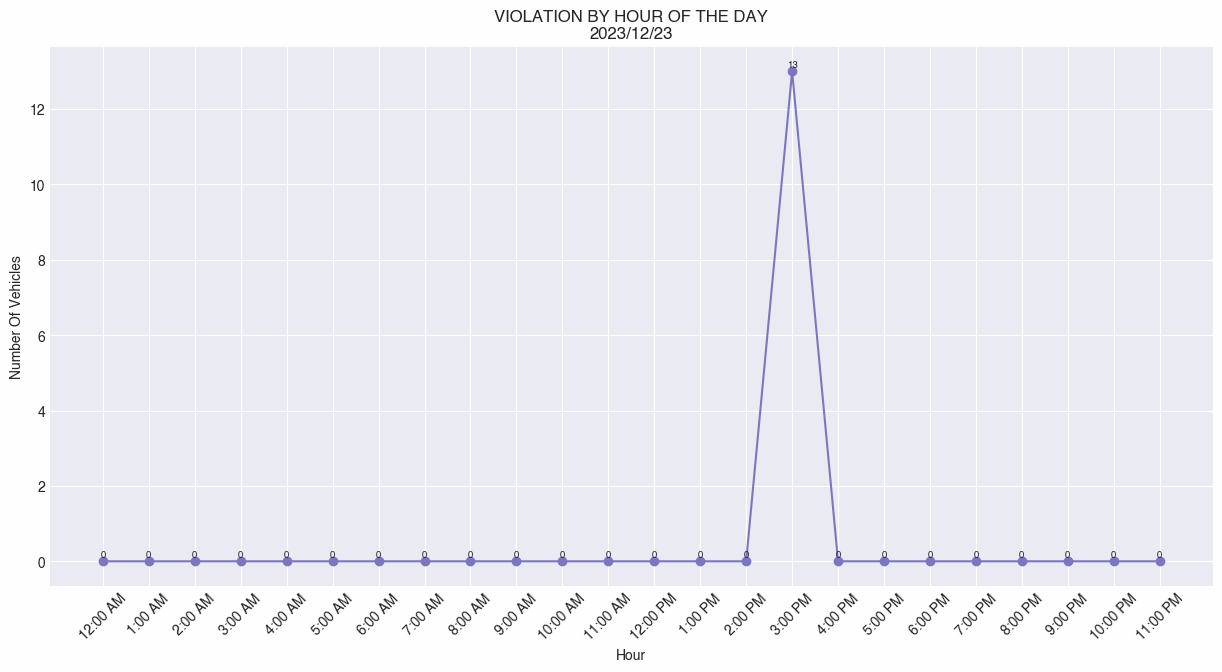

In [6]:
# Define X and Y variable data 
in_hour_count = []
for i in range(24):
	in_hour_count.append(len(df_oneDay[df_oneDay['Hour'] == i]))
      
df_oneday_chart = pd.DataFrame(list(zip(in_hour_count,hour_label)), columns=['Hour', 'Count'])
plt.figure(figsize=(15,7))
plt.xlabel("Hour")  # add X-axis label 
plt.xticks(rotation=45)
plt.ylabel("Number Of Vehicles")  # add Y-axis label 

plt.plot(df_oneday_chart['Count'], df_oneday_chart['Hour'], marker='o')
for j, v in enumerate(df_oneday_chart['Hour']):
    plt.text(j, v+0.1, str(v), fontsize=7, horizontalalignment='center')
    
plt.title("VIOLATION BY HOUR OF THE DAY\n2023/12/23")  # add title 

plt.show()


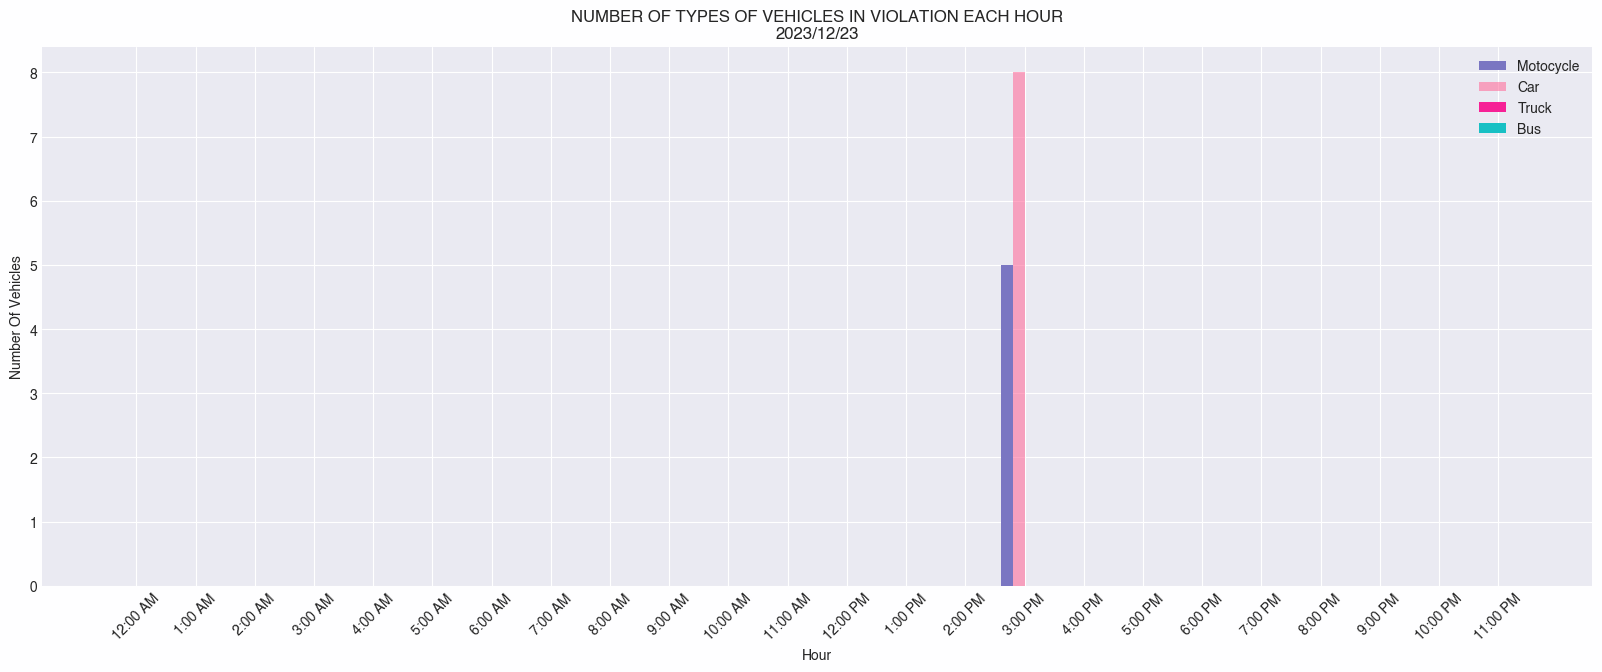

In [7]:
# create data 
col = np.arange(24) 
moto_in_hour_count = []
car_in_hour_count = []
truck_in_hour_count = []
bus_in_hour_count = []
for i in range(24):
	moto_in_hour_count.append(len(df_oneDay_moto[df_oneDay_moto['Hour'] == i]))
	car_in_hour_count.append(len(df_oneDay_car[df_oneDay_car['Hour'] == i]))
	truck_in_hour_count.append(len(df_oneDay_truck[df_oneDay_truck['Hour'] == i]))
	bus_in_hour_count.append(len(df_oneDay_bus[df_oneDay_bus['Hour'] == i]))

width = 0.2
  
# plot data in grouped manner of bar type 
plt.figure(figsize=(20,7))
plt.bar(col-0.3, moto_in_hour_count, width) 
plt.bar(col-0.1, car_in_hour_count, width) 
plt.bar(col+0.1, truck_in_hour_count, width) 
plt.bar(col+0.3, bus_in_hour_count, width) 
plt.xticks(col, hour_label, rotation=45) 
plt.xlabel("Hour")  # add X-axis label 
plt.ylabel("Number Of Vehicles")  # add Y-axis label 
plt.legend(["Motocycle", "Car", "Truck", "Bus"]) 

plt.title("NUMBER OF TYPES OF VEHICLES IN VIOLATION EACH HOUR\n2023/12/23")  # add title 

plt.show() 

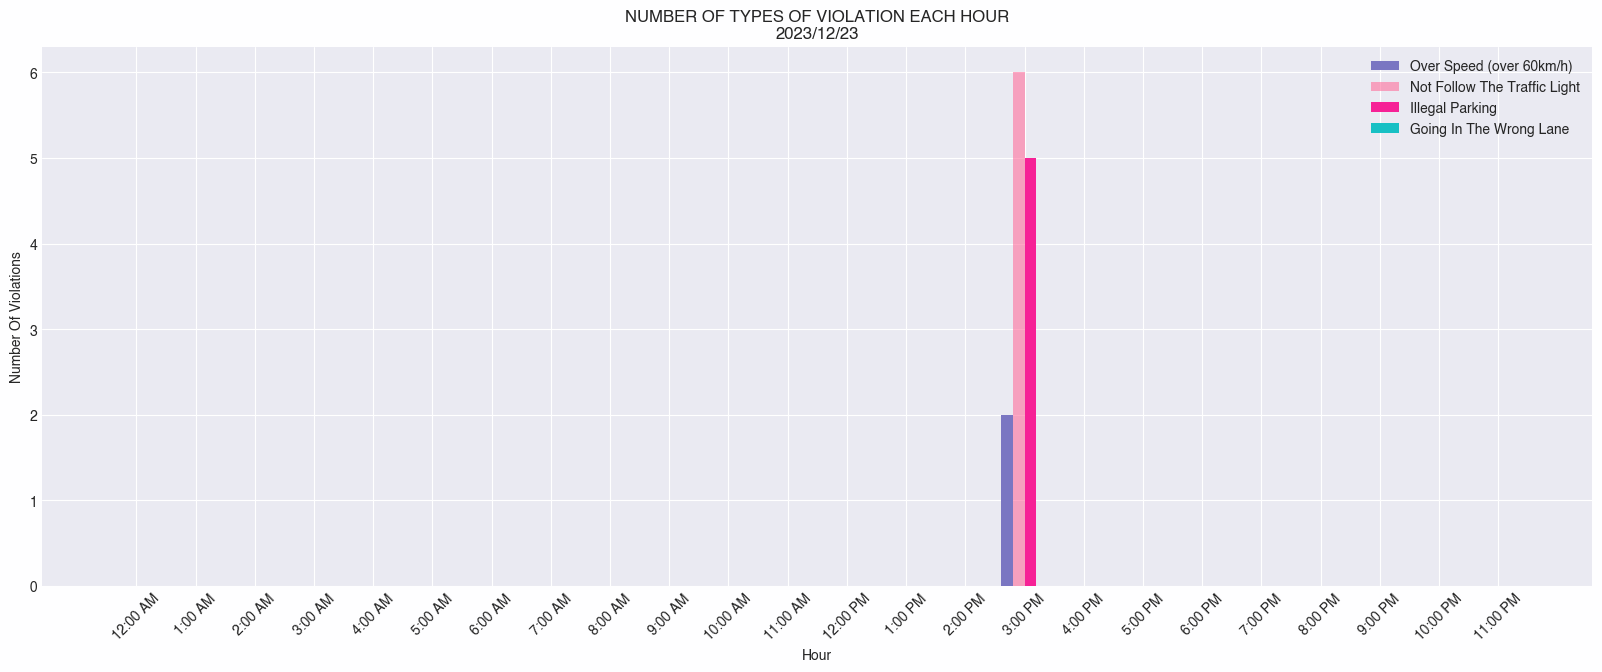

In [8]:
# create data 
col = np.arange(24) 
df_oneDay_0_count = []
df_oneDay_1_count = []
df_oneDay_2_count = []
df_oneDay_3_count = []
for i in range(24):
	df_oneDay_0_count.append(len(df_oneDay_0[df_oneDay_0['Hour'] == i]))
	df_oneDay_1_count.append(len(df_oneDay_1[df_oneDay_1['Hour'] == i]))
	df_oneDay_2_count.append(len(df_oneDay_2[df_oneDay_2['Hour'] == i]))
	df_oneDay_3_count.append(len(df_oneDay_3[df_oneDay_3['Hour'] == i]))

width = 0.2
  
# plot data in grouped manner of bar type 
plt.figure(figsize=(20,7))
plt.bar(col-0.3, df_oneDay_0_count, width) 
plt.bar(col-0.1, df_oneDay_1_count, width) 
plt.bar(col+0.1, df_oneDay_2_count, width) 
plt.bar(col+0.3, df_oneDay_3_count, width) 
plt.xticks(col, hour_label, rotation=45) 
plt.xlabel("Hour")  # add X-axis label 
plt.ylabel("Number Of Violations")  # add Y-axis label 
plt.legend(violation_label) 

plt.title("NUMBER OF TYPES OF VIOLATION EACH HOUR\n2023/12/23")  # add title 

plt.show() 

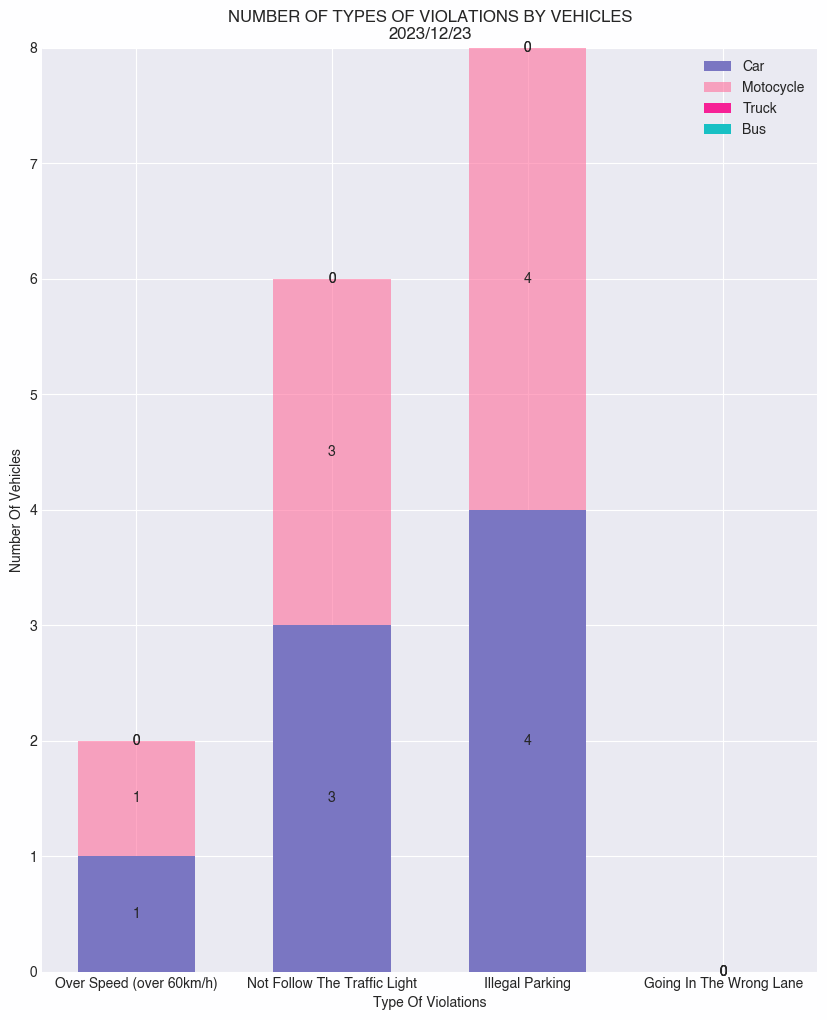

In [9]:
violation_in_hour_count = {
    'Car': np.array([len(df_oneDay_0[df_oneDay_0['VehicleType'] == "Car"]), len(df_oneDay_1[df_oneDay_1['VehicleType'] == "Car"]), len(df_oneDay_2[df_oneDay_2['VehicleType'] == "Car"]), len(df_oneDay_3[df_oneDay_3['VehicleType'] == "Car"])]),
    'Motocycle': np.array([len(df_oneDay_0[df_oneDay_0['VehicleType'] == "Car"]), len(df_oneDay_1[df_oneDay_1['VehicleType'] == "Car"]), len(df_oneDay_2[df_oneDay_2['VehicleType'] == "Car"]), len(df_oneDay_3[df_oneDay_3['VehicleType'] == "Car"])]),
    'Truck': np.array([len(df_oneDay_0[df_oneDay_0['VehicleType'] == "Truck"]), len(df_oneDay_1[df_oneDay_1['VehicleType'] == "Truck"]), len(df_oneDay_2[df_oneDay_2['VehicleType'] == "Truck"]), len(df_oneDay_3[df_oneDay_3['VehicleType'] == "Truck"])]),
    'Bus': np.array([len(df_oneDay_0[df_oneDay_0['VehicleType'] == "Bus"]), len(df_oneDay_1[df_oneDay_1['VehicleType'] == "Bus"]), len(df_oneDay_2[df_oneDay_2['VehicleType'] == "Bus"]), len(df_oneDay_3[df_oneDay_3['VehicleType'] == "Bus"])]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(10,12))

bottom = np.zeros(4)
for j, v in violation_in_hour_count.items():
    p = plt.bar(violation_label, v, width, label=j, bottom=bottom)
    bottom += v

    plt.bar_label(p, label_type='center')

plt.title("NUMBER OF TYPES OF VIOLATIONS BY VEHICLES\n2023/12/23")
plt.xlabel("Type Of Violations")  # add X-axis label 
plt.ylabel("Number Of Vehicles")  # add Y-axis label 
plt.legend()

plt.show()

In [10]:
df_main_0 = df_main[df_main['ViolationType'] == 0]
df_main_1 = df_main[df_main['ViolationType'] == 1]
df_main_2 = df_main[df_main['ViolationType'] == 2]
df_main_3 = df_main[df_main['ViolationType'] == 3]

In [ ]:
col = np.arange(7) 
violations_count_per_day0 = []
violations_count_per_day1 = []
violations_count_per_day2 = []
violations_count_per_day3 = []
for i in range(7):
	violations_count_per_day0.append(len(df_main_0[df_main_0['Day'] == str("2023-11-2" + str(i))]))
	violations_count_per_day1.append(len(df_main_1[df_main_1['Day'] == str("2023-11-2" + str(i))]))
	violations_count_per_day2.append(len(df_main_2[df_main_2['Day'] == str("2023-11-2" + str(i))]))
	violations_count_per_day3.append(len(df_main_3[df_main_3['Day'] == str("2023-11-2" + str(i))]))

width = 0.2
  
# plot data in grouped manner of bar type 
plt.figure(figsize=(15,7))
plt.bar(col-0.3, violations_count_per_day0, width)
plt.bar(col-0.1, violations_count_per_day1, width)
plt.bar(col+0.1, violations_count_per_day2, width)
plt.bar(col+0.3, violations_count_per_day3, width) 
plt.legend(violation_label)

plt.plot(col-0.3, violations_count_per_day0, marker='o', color='orange')
plt.plot(col-0.1, violations_count_per_day1, marker='o', color='orange')
plt.plot(col+0.1, violations_count_per_day2, marker='o', color='orange')
plt.plot(col+0.3, violations_count_per_day3, marker='o', color='orange')

plt.xticks(col, date_label, rotation=45) 
plt.xlabel("Date of Week")  # add X-axis label 
plt.ylabel("Number Of Violations")  # add Y-axis label 


for j, v in enumerate(violations_count_per_day0):
    plt.text(j-0.3, v+2, str(v), fontsize=7, horizontalalignment='center')
for j, v in enumerate(violations_count_per_day1):
    plt.text(j-0.1, v+2, str(v), fontsize=7, horizontalalignment='center')
for j, v in enumerate(violations_count_per_day2):
    plt.text(j+0.1, v+2, str(v), fontsize=7, horizontalalignment='center')
for j, v in enumerate(violations_count_per_day3):
    plt.text(j+0.3, v+2, str(v), fontsize=7, horizontalalignment='center')
    
plt.title("VIOLATIONS DURING EACH DATE IN WEEK\n2023/11/20 - 2023/11/26")  # add title 

plt.show() 
